<center>
    <h1>DatatableTon</h1>
    💯 datatable exercises
    <br>
    <br>
    <a href='https://github.com/vopani/datatableton/blob/master/LICENSE'>
        <img src='https://img.shields.io/badge/license-Apache%202.0-blue.svg?logo=apache'>
    </a>
    <a href='https://github.com/vopani/datatableton'>
        <img src='https://img.shields.io/github/stars/vopani/datatableton?color=yellowgreen&logo=github'>
    </a>
    <a href='https://twitter.com/vopani'>
        <img src='https://img.shields.io/twitter/follow/vopani'>
    </a>
</center>

<center>
    This is Set 9: Native Models (Exercises 81-90) of <b>DatatableTon</b>: <i>💯 datatable exercises</i>
    <br>
    You can find all the exercises and solutions on <a href="https://github.com/vopani/datatableton#exercises-">GitHub</a>
</center>

**Prerequisites**
* The `datatable` package should be upgraded to the latest version (or v1.0.0+).
* The sample dataset [1% sample of KDD Cup 2012 (CTR Prediction)](https://www.openml.org/d/1219) from openml will be used for the exercises.

In [1]:
!python3 -m pip install -U pip
!python3 -m pip install -U datatable
!wget https://www.openml.org/data/get_csv/183151/kdd_ctr.csv

     |████████████████████████████████| 1.6 MB 595 kB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.2
    Uninstalling pip-21.1.2:
      Successfully uninstalled pip-21.1.2
--2021-07-31 11:45:58--  https://www.openml.org/data/get_csv/183151/kdd_ctr.csv
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘kdd_ctr.csv’

kdd_ctr.csv             [  <=>               ]  27.50M  87.9MB/s    in 0.3s    

2021-07-31 11:45:58 (87.9 MB/s) - ‘kdd_ctr.csv’ saved [28837031]



In [2]:
import datatable as dt

data = dt.fread('kdd_ctr.csv', fill=True)[1:,:]
data

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
,▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,0,1,1.071e+19,8343295,11700,3,3,7702266,21264,27892,1559,0
1,1,1,1.73639e+19,20017077,23798,1,1,93079,35498,4,36476,562934
2,0,1,8.91547e+18,21348354,36654,1,1,10981,19975,36105,33292,11621116
3,0,1,4.42669e+18,20366086,33280,3,3,0,5942,4057,4390,8778348
4,0,1,1.15726e+19,6803526,10790,2,1,9881978,60593,25242,1679,12118311
5,1,1,2.82758e+17,21186478,35793,2,1,163315,4871,3257,1153,2886008
6,0,1,8.8139e+18,20886690,34840,2,2,316,543,2206,2888,7589739
7,0,1,3.81103e+18,21367376,20667,3,2,2601439,118,9594,9705,579253
8,0,1,9.80684e+18,21811752,37737,3,2,1631,333,841,2175,5277279


**Exercise 81: Initialize a FTRL model `model_ftrl`**

In [3]:
from datatable.models import Ftrl

model_ftrl = Ftrl()
model_ftrl

**Exercise 82: Display the hyperparameters of `model_ftrl`**

In [4]:
model_ftrl.params

FtrlParams(alpha=0.005, beta=1.0, lambda1=0.0, lambda2=0.0, nbins=1000000, mantissa_nbits=10, nepochs=1.0, double_precision=False, negative_class=False, interactions=None, model_type='auto')

**Exercise 83: Split `data` into `train_data` consisting of the first 75% of rows and `valid_data` consisting of the last 25% of rows**

In [5]:
train_data = data[:round(data.nrows * 0.75), :]
train_data.shape

(299612, 12)

In [6]:
valid_data = data[round(data.nrows * 0.75):, :]
valid_data.shape

(99870, 12)

**Exercise 84: Assign the target variable `click` to `train_target` from `train_data` and `valid_target` from `valid_data` and drop the columns `url_hash` and `click` from `train_data` and `valid_data`**

In [7]:
train_target = train_data['click']
train_target.head()

,click
,▪
0,0
1,1
2,0
3,0
4,0
5,1
6,0
7,0
8,0


In [8]:
valid_target = valid_data['click']
valid_target.head()

,click
,▪
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0


In [9]:
del train_data[:, ['url_hash', 'click']]
train_data.head()

,impression,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,1,8343295,11700,3,3,7702266,21264,27892,1559,0
1,1,20017077,23798,1,1,93079,35498,4,36476,562934
2,1,21348354,36654,1,1,10981,19975,36105,33292,11621116
3,1,20366086,33280,3,3,0,5942,4057,4390,8778348
4,1,6803526,10790,2,1,9881978,60593,25242,1679,12118311
5,1,21186478,35793,2,1,163315,4871,3257,1153,2886008
6,1,20886690,34840,2,2,316,543,2206,2888,7589739
7,1,21367376,20667,3,2,2601439,118,9594,9705,579253
8,1,21811752,37737,3,2,1631,333,841,2175,5277279


In [10]:
del valid_data[:, ['url_hash', 'click']]
valid_data.head()

,impression,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,1,21104237,29683,2,2,10689741,11495,43449,1704,11631003
1,1,21162526,1325,2,1,15,10,24,25,2220103
2,1,9027613,23808,2,1,2940,692,138,198,11428948
3,1,21866030,385,3,1,3801572,742504,2551939,1725632,1927769
4,1,10397715,27354,3,1,41805,15602,675726,315253,340926
5,1,21264083,36307,2,1,2491,2723,502995,228073,0
6,1,1000515,2714,3,3,349332,4075,3106,3835,0
7,1,21362188,36729,1,1,14198118,647,2046,2265,376316
8,2,3048011,23782,1,1,28487,484,322,463,31285


**Exercise 85: Train `model_ftrl` using `train_data` and `train_target`**

In [11]:
model_ftrl.fit(train_data, train_target)
model_ftrl

**Exercise 86: Assign the feature importances of `model_ftrl` to `model_ftrl_fimp`**

In [12]:
model_ftrl_fimp = model_ftrl.feature_importances
model_ftrl_fimp

,feature_name,feature_importance
,▪▪▪▪,▪▪▪▪
0,impression,1
1,ad_id,0.0139663
2,advertiser_id,0.0764374
3,depth,0.670357
4,position,0.707858
5,query_id,0.0125131
6,keyword_id,0.0170846
7,title_id,0.0100467
8,description_id,0.0128133


**Exercise 87: Use `model_ftrl` to predict on `valid_data` and assign the predictions to `preds_ftrl`**

In [13]:
preds_ftrl = model_ftrl.predict(valid_data)
preds_ftrl

,False,True
,▪▪▪▪,▪▪▪▪
0,0.84105,0.15895
1,0.755372,0.244628
2,0.78171,0.21829
3,0.825281,0.174719
4,0.824208,0.175792
5,0.859644,0.140356
6,0.90485,0.0951504
7,0.807443,0.192557
8,0.644633,0.355367


**Exercise 88: Calculate the mean absolute error of `preds_ftrl` with `valid_target`**

In [14]:
preds = dt.cbind(preds_ftrl, valid_target)
preds[:, dt.mean(dt.math.abs(dt.f.click - dt.f['True']))][0, 0]

0.27247005701065063

**Exercise 89: Train a new FTRL model `model_ftrl_2` with `lambda2=1.2`, `nepochs=5` and `double_precision=True` using `train_data` and `train_target`**

In [15]:
model_ftrl_2 = Ftrl(lambda2=1.2, nepochs=5, double_precision=True)
model_ftrl_2.fit(train_data, train_target)
model_ftrl_2

**Exercise 90: Train a new FTRL model `model_ftrl_cv` with `alpha=0.01` and `nepochs=3` over 5-fold cross-validation using all features in `data` and assign the cross-validated predictions along with the target variable `click` to `preds_ftrl_cv`**

In [16]:
from datatable.models import kfold

preds_ftrl_cv = dt.Frame()

for (train_idx, valid_idx) in kfold(nrows=data.nrows, nsplits=5):
    train_data = data[train_idx, [col for col in data.names if col != 'click']]
    valid_data = data[valid_idx, [col for col in data.names if col != 'click']]
    train_target = data[train_idx, 'click']
    valid_target = data[valid_idx, 'click']

    model_ftrl_cv = Ftrl(alpha=0.01, nepochs=3)
    model_ftrl_cv.fit(train_data, train_target)
    preds_ftrl = model_ftrl_cv.predict(valid_data)
    preds_ftrl.cbind(valid_target)

    preds_ftrl_cv.rbind(preds_ftrl)

preds_ftrl_cv

,False,True,click
,▪▪▪▪,▪▪▪▪,▪
0,0.946123,0.0538765,0
1,0.805348,0.194652,1
2,0.815289,0.184711,0
3,0.95541,0.0445901,0
4,0.785888,0.214112,0
5,0.756665,0.243335,1
6,0.842656,0.157344,0
7,0.912981,0.0870192,0
8,0.901132,0.0988675,0


✅ This completes Set 9: Native Models (Exercises 81-90) of **DatatableTon**: *💯 datatable exercises*

#### Set 10 • Capstone Projects • Expert • Exercises 91-100

| Style | Colab | Kaggle | Binder | GitHub |
| ----- | ----- | ------ | ------ | ------ |
| Exercises | [![Open in Colab](https://img.shields.io/static/v1?label=&message=Open%20in%20Colab&labelColor=grey&color=blue&logo=google-colab)](https://colab.research.google.com/github/vopani/datatableton/blob/main/notebooks/10_capstone_projects_exercises.ipynb) | [![Open in Kaggle](https://img.shields.io/static/v1?label=&message=Open%20in%20Kaggle&labelColor=grey&color=blue&logo=kaggle)](https://www.kaggle.com/rohanrao/datatableton-capstone-projects-exercises) | [![Open in Binder](https://img.shields.io/static/v1?label=&message=Open%20in%20Binder&labelColor=grey&color=blue&logo=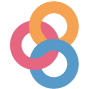)](https://mybinder.org/v2/gh/vopani/datatableton/main?filepath=notebooks%2F10_capstone_projects_exercises.ipynb) | [![Open in GitHub](https://img.shields.io/static/v1?label=&message=Open%20in%20GitHub&labelColor=grey&color=blue&logo=github)](https://github.com/vopani/datatableton/blob/main/notebooks/10_capstone_projects_exercises.ipynb) |
| Solutions | [![Open in Colab](https://img.shields.io/static/v1?label=&message=Open%20in%20Colab&labelColor=grey&color=blue&logo=google-colab)](https://colab.research.google.com/github/vopani/datatableton/blob/main/notebooks/10_capstone_projects_solutions.ipynb) | [![Open in Kaggle](https://img.shields.io/static/v1?label=&message=Open%20in%20Kaggle&labelColor=grey&color=blue&logo=kaggle)](https://www.kaggle.com/rohanrao/datatableton-capstone-projects-solutions) | [![Open in Binder](https://img.shields.io/static/v1?label=&message=Open%20in%20Binder&labelColor=grey&color=blue&logo=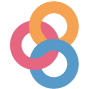)](https://mybinder.org/v2/gh/vopani/datatableton/main?filepath=notebooks%2F10_capstone_projects_solutions.ipynb) | [![Open in GitHub](https://img.shields.io/static/v1?label=&message=Open%20in%20GitHub&labelColor=grey&color=blue&logo=github)](https://github.com/vopani/datatableton/blob/main/notebooks/10_capstone_projects_solutions.ipynb) |

You can find all the exercises and solutions on [GitHub](https://github.com/vopani/datatableton#exercises-)